# Architecture of CNN

![alt text](image.png)

<br>
We are directed to:
<br>

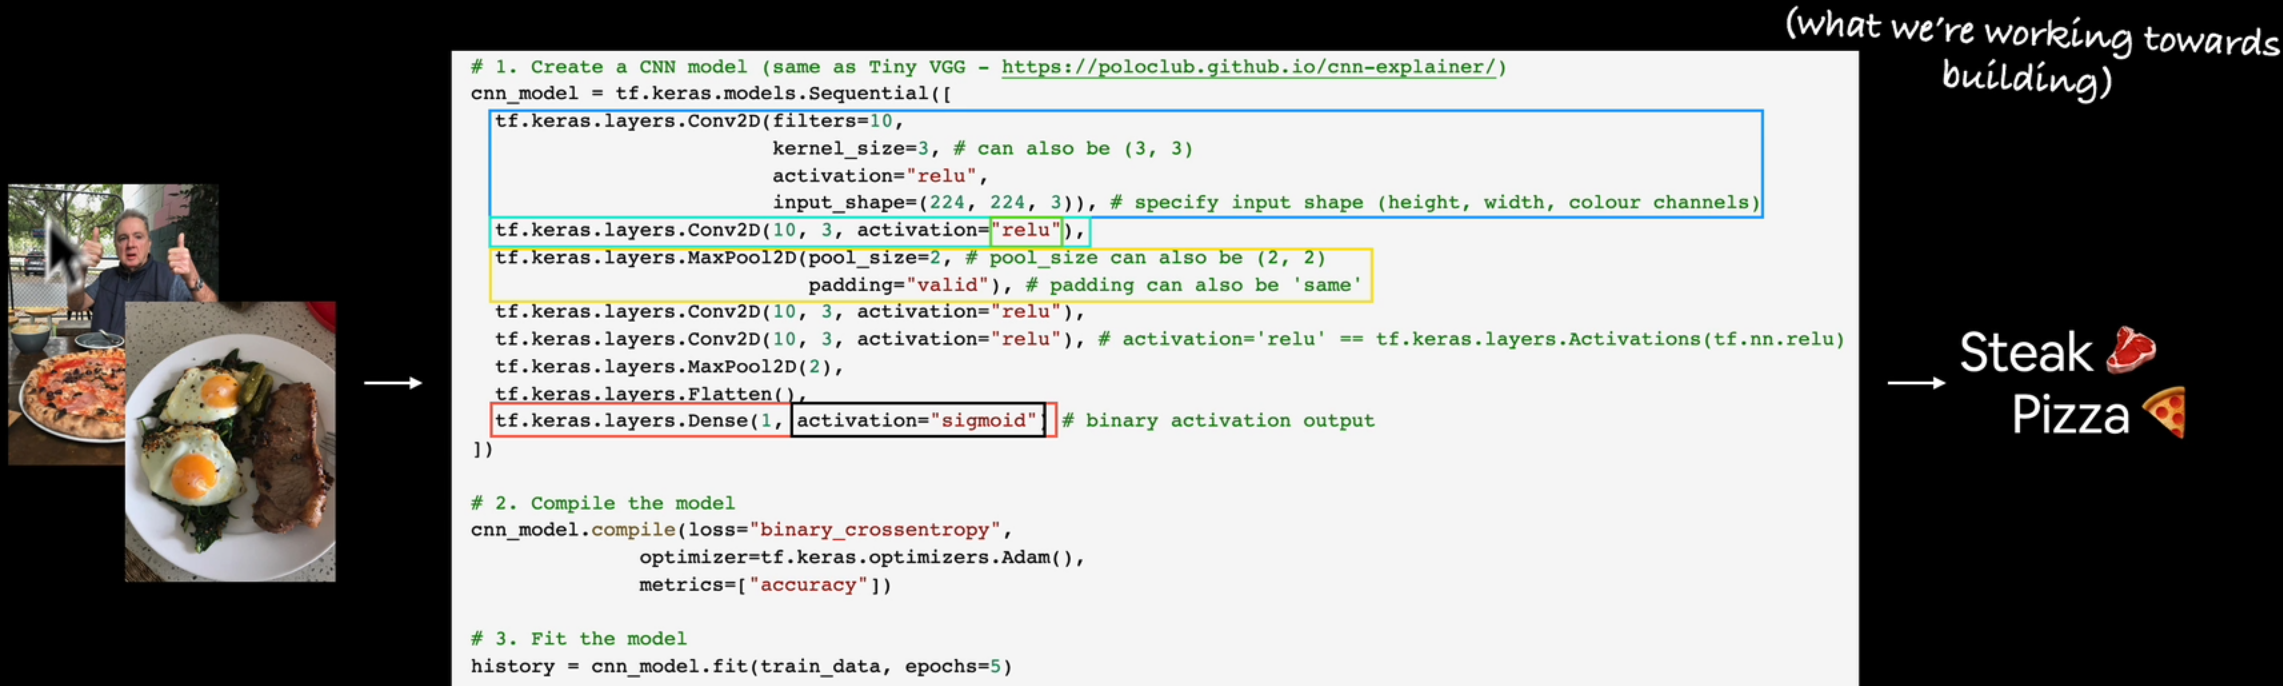

# Code of computer vision

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as camera of driving car recognize car in front.

## Get the data
Data Pizza_steak is a part of Food101 dataset prepared by a trainer.

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-07-29 11:37:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.209.27, 216.58.215.123, 142.250.75.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.209.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  18.0MB/s    in 6.5s    

2025-07-29 11:37:41 (16.1 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (understand it)

A very crucial step at the beginning of any ML project is becoming one with the data.

And for CV project this usually means visualizing many samples of the data.

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib
import numpy as np
import tensorflow as tf

2025-07-29 13:16:29.957782: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-29 13:16:29.969343: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-29 13:16:30.119138: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-29 13:16:30.276744: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753787790.381976   51381 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753787790.41

In [31]:
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))

In [32]:


def view_random_image(target_dir, target_class):
    """Shows and returns a random image from target folder. 

    Args:
        target_dir (_type_): _description_
        target_class (_type_): _description_

    Returns:
        _type_: _description_
    """
    target_folder = pathlib.Path(target_dir) / target_class
    random_image = random.sample([x for x in target_folder.iterdir()], 1)
    img = mpimg.imread(random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    plt.show()
    print(f"Image shape: {img.shape}")
    return img

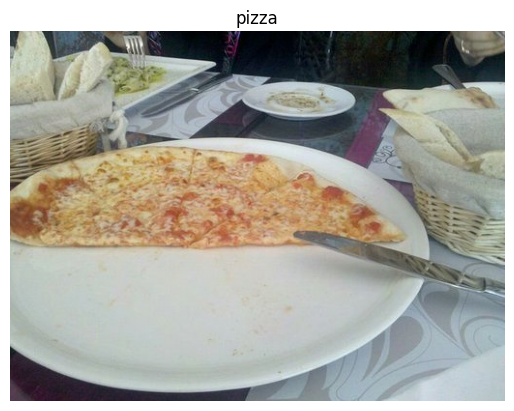

Image shape: (383, 512, 3)


In [33]:
img = view_random_image("pizza_steak/train", "pizza")

In [35]:
# View the image shape
img.shape

(383, 512, 3)

## Build CNN

Build a CNN to find patterns in our images:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

### Load and preprocess data

In [63]:
import tensorflow as tf
import keras.models as models
import keras.optimizers as optimizers
import keras.losses as losses
import keras.layers as layers
import keras.activations as activations
import pathlib

train_dir = pathlib.Path("pizza_steak/train")
test_dir = pathlib.Path("pizza_steak/test")

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
SEED = 42



In [49]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,  
        image_size=(IMG_HEIGHT, IMG_WIDTH), 
        batch_size=BATCH_SIZE,
        seed=SEED,
        shuffle=True,
        label_mode="binary",
    )

valid_data = tf.keras.preprocessing.image_dataset_from_directory(
        test_dir,  
        image_size=(IMG_HEIGHT, IMG_WIDTH), 
        batch_size=BATCH_SIZE,
        seed=SEED,
        shuffle=True,
        label_mode="binary",
    )

def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply normalization and optimize for performance
train_data = train_data.map(normalize_img).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = valid_data.map(normalize_img).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 1500 files belonging to 2 classes.


Found 500 files belonging to 2 classes.


In [65]:
len(train_data)

47

In [57]:
for images, labels in valid_data.take(1):
    print("Shape of a batch of images:", images.shape)
    print("Shape of a batch of labels:", labels.shape)
    print("Min pixel value:", tf.reduce_min(images))
    print("Max pixel value:", tf.reduce_max(images))

Shape of a batch of images: (32, 224, 224, 3)
Shape of a batch of labels: (32, 1)
Min pixel value: tf.Tensor(0.0, shape=(), dtype=float32)
Max pixel value: tf.Tensor(1.0, shape=(), dtype=float32)


In [60]:
a = [(images[0], labels[0]) for images, labels in valid_data.take(1)]

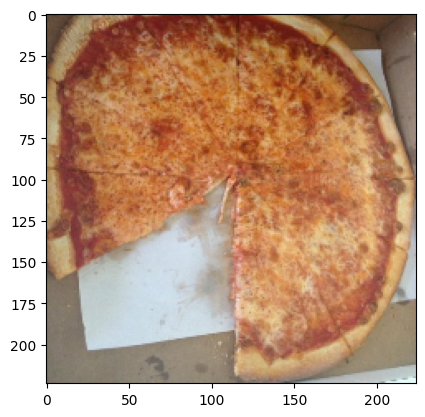

In [62]:
plt.imshow(a[0][0])

### Prepare model

In [67]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)))
model_1.add(layers.Conv2D(filters=10, kernel_size=3, activation="relu"))
model_1.add(layers.MaxPool2D(pool_size=2, padding="valid"))
model_1.add(layers.Conv2D(filters=10, kernel_size=3, activation="relu"))
model_1.add(layers.Conv2D(filters=10, kernel_size=3, activation="relu"))
model_1.add(layers.MaxPool2D(pool_size=2))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(1, activation="sigmoid"))

model_1.compile(optimizer=optimizers.Adam(), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

history_1 = model_1.fit(
    train_data, 
    epochs=5, 
    steps_per_epoch=len(train_data), 
    validation_data=valid_data, 
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.5911 - loss: 0.6629 - val_accuracy: 0.6760 - val_loss: 0.5814
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - accuracy: 0.6933 - loss: 0.5836 - val_accuracy: 0.8040 - val_loss: 0.4498
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.7713 - loss: 0.4795 - val_accuracy: 0.8340 - val_loss: 0.3916
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 0.8272 - loss: 0.4102 - val_accuracy: 0.8440 - val_loss: 0.3461
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.8563 - loss: 0.3637 - val_accuracy: 0.8780 - val_loss: 0.3243
